In [9]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [14]:
x_test.shape

(10000, 28, 28)

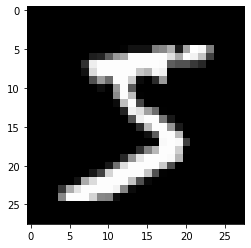

In [18]:
plt.imshow(x_train[0],cmap='gray')

In [51]:
image_height,image_width=28,28
x_train=x_train.reshape(60000,image_height*image_width)

In [52]:
x_test=x_test.reshape(10000,image_height*image_width)

In [60]:
x_test.shape

(10000, 784)

In [53]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [54]:
x_train /=255.0
x_test /= 255.0

In [57]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [40]:
y_train.shape

(60000, 10)

In [41]:
model=Sequential()

In [43]:
model.add(Dense(512,activation='relu', input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [44]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [58]:
history=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 28s 470us/step - loss: 0.1842 - accuracy: 0.9435 - val_loss: 0.0944 - val_accuracy: 0.9702
Epoch 2/20
60000/60000 [==============================] - 27s 447us/step - loss: 0.0825 - accuracy: 0.9744 - val_loss: 0.0849 - val_accuracy: 0.9730
Epoch 3/20
60000/60000 [==============================] - 26s 436us/step - loss: 0.0559 - accuracy: 0.9827 - val_loss: 0.0726 - val_accuracy: 0.9789
Epoch 4/20
60000/60000 [==============================] - 27s 451us/step - loss: 0.0412 - accuracy: 0.9871 - val_loss: 0.0789 - val_accuracy: 0.9790
Epoch 5/20
60000/60000 [==============================] - 27s 453us/step - loss: 0.0348 - accuracy: 0.9889 - val_loss: 0.0837 - val_accuracy: 0.9793
Epoch 6/20
60000/60000 [==============================] - 26s 439us/step - loss: 0.0301 - accuracy: 0.9903 - val_loss: 0.0761 - val_accuracy: 0.9807
Epoch 7/20
60000/60000 [==============================] 

In [68]:
model.predict_classes(x_test)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [70]:
y1_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [71]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 58us/step


[0.13767215903434585, 0.982200026512146]

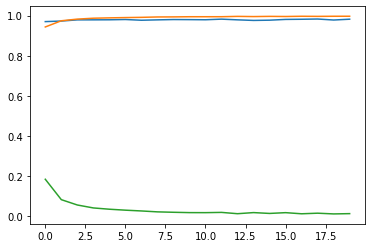

In [84]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])